In [5]:
# import necessary lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


# data preparation

In [6]:
#loadd
df=pd.read_csv(r"C:\Users\91939\Downloads\avocado.csv")

In [7]:
#explore the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# answering questions

In [9]:
def get_average(df,column):
    return sum(df[column])/len(df)

In [10]:
def get_average_between_two_columns(df,column1,column2):
    List=list(df[column1].unique())
    average=[]
    for i in List:
        x=df[df[column1]==i]
        column1_average=get_average(x,column2)
        average.append(column1_average)
        
    df_column1_column2=pd.DataFrame({'column1':List,'column2':average})
    column1_column2_sorted_index=df_column1_column2.column2.sort_values(ascending=False).index.values
    column1_column2_sorted_data=df_column1_column2.reindex(column1_column2_sorted_index)
    
    
    return column1_column2_sorted_data
    

In [11]:
def plot(data,xlabel,ylabel):
    plt.figure(figsize=(15,5))
    ax=sns.barplot(x=data.column1,y=data.column2,palette='rocket')
    plt.xticks(rotation=90)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(('Average'+ylabel+'of Avocado According to'+xlabel))

# which region are the lowest and highest of Avocado prices

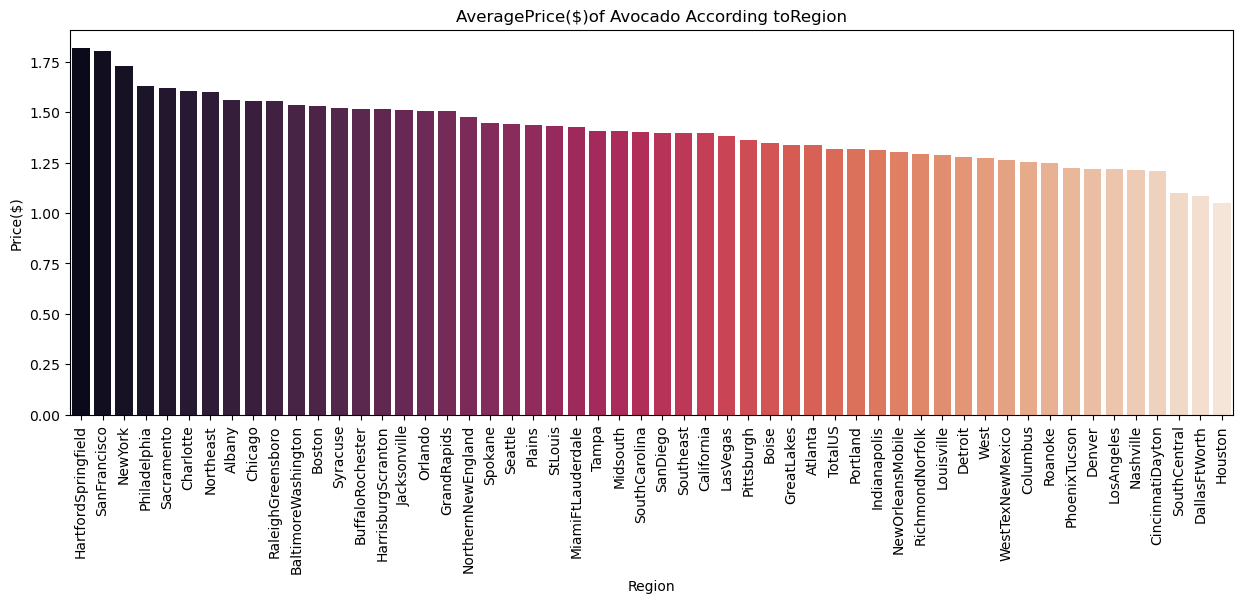

In [12]:
data1=get_average_between_two_columns(df,'region','AveragePrice')
plot(data1,'Region','Price($)')

In [13]:
print(data1['column1'].iloc[-1],"is the region producing avocado with the lowest price")

Houston is the region producing avocado with the lowest price


# what is the highest region of avocado production

Text(0.5, 1.0, 'Figure:Boxplot representing outlier columns')

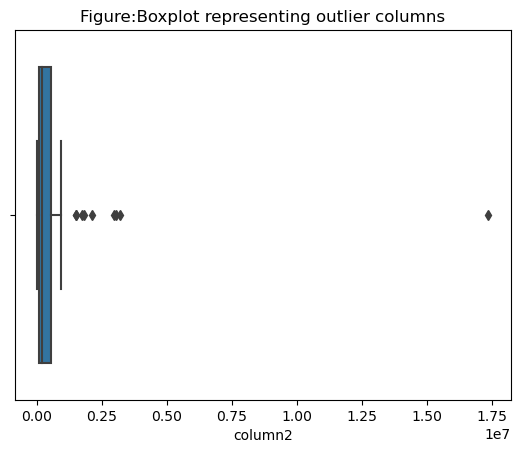

In [14]:
# checking if there are outliers ot not

data2=get_average_between_two_columns(df,'region','Total Volume')
sns.boxplot(x=data2.column2).set_title('Figure:Boxplot representing outlier columns')

In [15]:
outlier_region=data2[data2.column2>10000000]
print(outlier_region['column1'].iloc[-1],"is outlier value")

TotalUS is outlier value


In [16]:
# remove outlier 
outlier_region.index
data2=data2.drop(outlier_region.index,axis=0)

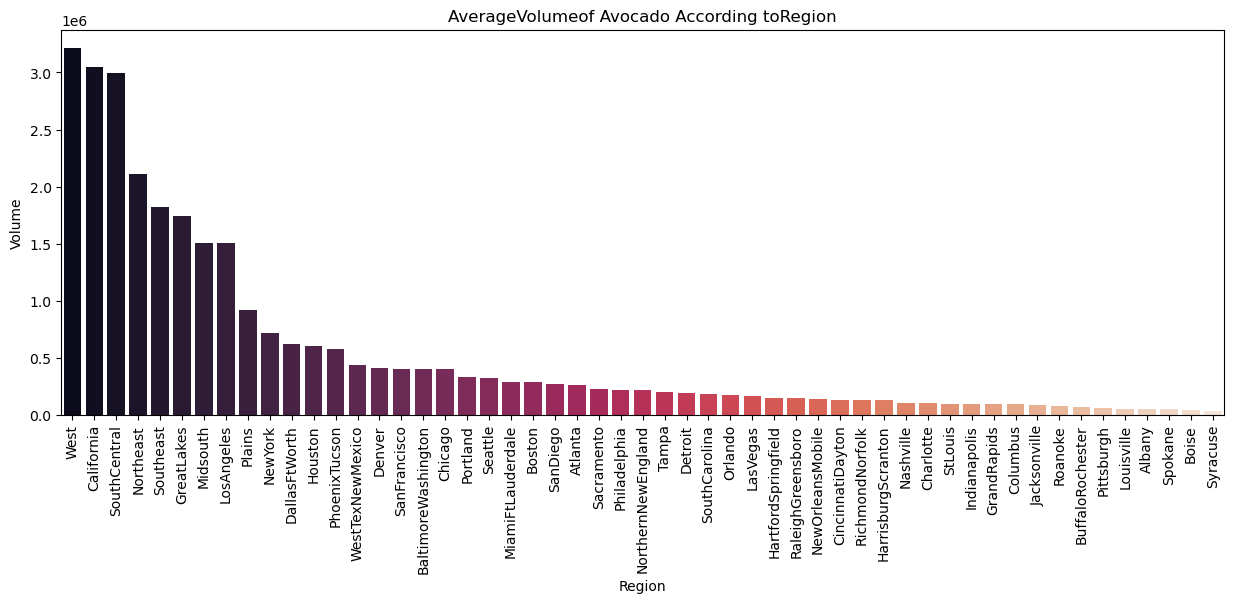

In [17]:
plot(data2,'Region','Volume')

# what is the avocado volume each year

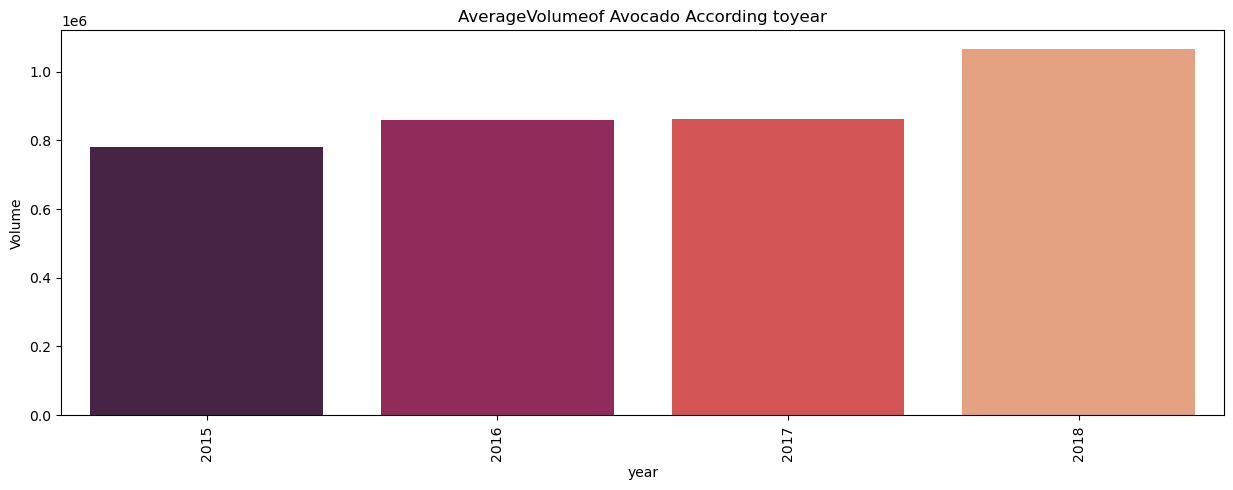

In [18]:
data4=get_average_between_two_columns(df,'year','Total Volume')
plot(data4,'year','Volume')

# data modelling

In [19]:
#changing some column tyoes to categories
df['region']=df['region'].astype('category')
df['region']=df['region'].cat.codes

df['type']=df['type'].astype('category')
df['type']=df['type'].cat.codes

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  int8   
 12  year          18249 non-null  int64  
 13  region        18249 non-null  int8   
dtypes: float64(9), int64(2), int8(2), object(1)
memory usage: 1.7+ MB


In [21]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [22]:
#splot data
X=df.drop(['AveragePrice'],axis=1)
y=df['AveragePrice']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=15)

In [23]:
print("training set:",X_train.shape,'-',y_train.shape[0],'samples')
print("testing set:",X_test.shape,'_',y_test.shape[0],'samples')

training set: (12774, 13) - 12774 samples
testing set: (5475, 13) _ 5475 samples


In [24]:
# build and fit the model
model=LinearRegression(normalize=True)
model.fit(X_train,y_train)

TypeError: LinearRegression.__init__() got an unexpected keyword argument 'normalize'

# evaluate results

In [25]:
#prediction and calculate the accuracy for the test data
test_pre=model.predict(X_test)
test_score=re_score(y_test,test_pre)
print("The accuracy of testing dataset",test_score*100)

NameError: name 'model' is not defined

In [26]:
#predict and calculate accuracy of train data
train_pre=model.predict(X_train)
train_score=r2_score(y_train,train_pre)
print("The accuracy of training dataset",train_score*100)

NameError: name 'model' is not defined